In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [3]:
#load dataset
data = np.load('ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [4]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.05, random_state=1234)

In [5]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


In [6]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

C:\Users\athar\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [8]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 6s - loss: 3.0068 - accuracy: 0.0351 - val_loss: 3.0186 - val_accuracy: 0.0000e+00 - 6s/epoch - 6s/step
Epoch 2/250
1/1 - 3s - loss: 2.9861 - accuracy: 0.0614 - val_loss: 3.0247 - val_accuracy: 0.0833 - 3s/epoch - 3s/step
Epoch 3/250
1/1 - 3s - loss: 3.0083 - accuracy: 0.0658 - val_loss: 3.0233 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 4/250
1/1 - 3s - loss: 3.0202 - accuracy: 0.0614 - val_loss: 3.0187 - val_accuracy: 0.0833 - 3s/epoch - 3s/step
Epoch 5/250
1/1 - 3s - loss: 3.0021 - accuracy: 0.0482 - val_loss: 3.0140 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 6/250
1/1 - 3s - loss: 3.0225 - accuracy: 0.0658 - val_loss: 3.0084 - val_accuracy: 0.0000e+00 - 3s/epoch - 3s/step
Epoch 7/250
1/1 - 2s - loss: 2.9932 - accuracy: 0.0395 - val_loss: 3.0067 - val_accuracy: 0.0833 - 2s/epoch - 2s/step
Epoch 8/250
1/1 - 2s - loss: 2.9774 - accuracy: 0.0439 - val_loss: 3.0040 - val_accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 9/250
1/1 - 2s - loss: 2.9781 

Epoch 69/250
1/1 - 2s - loss: 0.8270 - accuracy: 0.7500 - val_loss: 0.4577 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 70/250
1/1 - 2s - loss: 0.7864 - accuracy: 0.7851 - val_loss: 0.4238 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 71/250
1/1 - 2s - loss: 0.7449 - accuracy: 0.7719 - val_loss: 0.4102 - val_accuracy: 0.9167 - 2s/epoch - 2s/step
Epoch 72/250
1/1 - 2s - loss: 0.6633 - accuracy: 0.8202 - val_loss: 0.3875 - val_accuracy: 0.9167 - 2s/epoch - 2s/step
Epoch 73/250
1/1 - 2s - loss: 0.7081 - accuracy: 0.8246 - val_loss: 0.3352 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 74/250
1/1 - 2s - loss: 0.6442 - accuracy: 0.7763 - val_loss: 0.3132 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 75/250
1/1 - 2s - loss: 0.6408 - accuracy: 0.8202 - val_loss: 0.2916 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 76/250
1/1 - 2s - loss: 0.6219 - accuracy: 0.8246 - val_loss: 0.2714 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 77/250
1/1 - 2s - loss: 0.5941 - accuracy:

Epoch 138/250
1/1 - 2s - loss: 0.0287 - accuracy: 0.9956 - val_loss: 0.0023 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 139/250
1/1 - 3s - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 140/250
1/1 - 2s - loss: 0.0483 - accuracy: 0.9956 - val_loss: 0.0023 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 141/250
1/1 - 3s - loss: 0.0396 - accuracy: 0.9956 - val_loss: 0.0025 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 142/250
1/1 - 3s - loss: 0.0510 - accuracy: 0.9912 - val_loss: 0.0041 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 143/250
1/1 - 3s - loss: 0.0358 - accuracy: 0.9912 - val_loss: 0.0081 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 144/250
1/1 - 3s - loss: 0.0517 - accuracy: 0.9912 - val_loss: 0.0103 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 145/250
1/1 - 3s - loss: 0.0455 - accuracy: 0.9956 - val_loss: 0.0094 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 146/250
1/1 - 3s - loss: 0.0266 - 

Epoch 206/250
1/1 - 2s - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.0013 - val_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 207/250
1/1 - 3s - loss: 0.0199 - accuracy: 0.9956 - val_loss: 0.0015 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 208/250
1/1 - 3s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 209/250
1/1 - 3s - loss: 0.0182 - accuracy: 0.9956 - val_loss: 0.0020 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 210/250
1/1 - 3s - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 211/250
1/1 - 3s - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 212/250
1/1 - 3s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0018 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 213/250
1/1 - 3s - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 214/250
1/1 - 3s - loss: 0.0117 - 

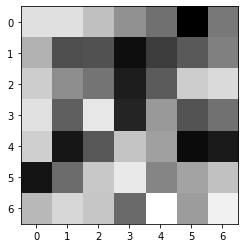

In [27]:
top_layer = cnn_model.layers[0]
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')

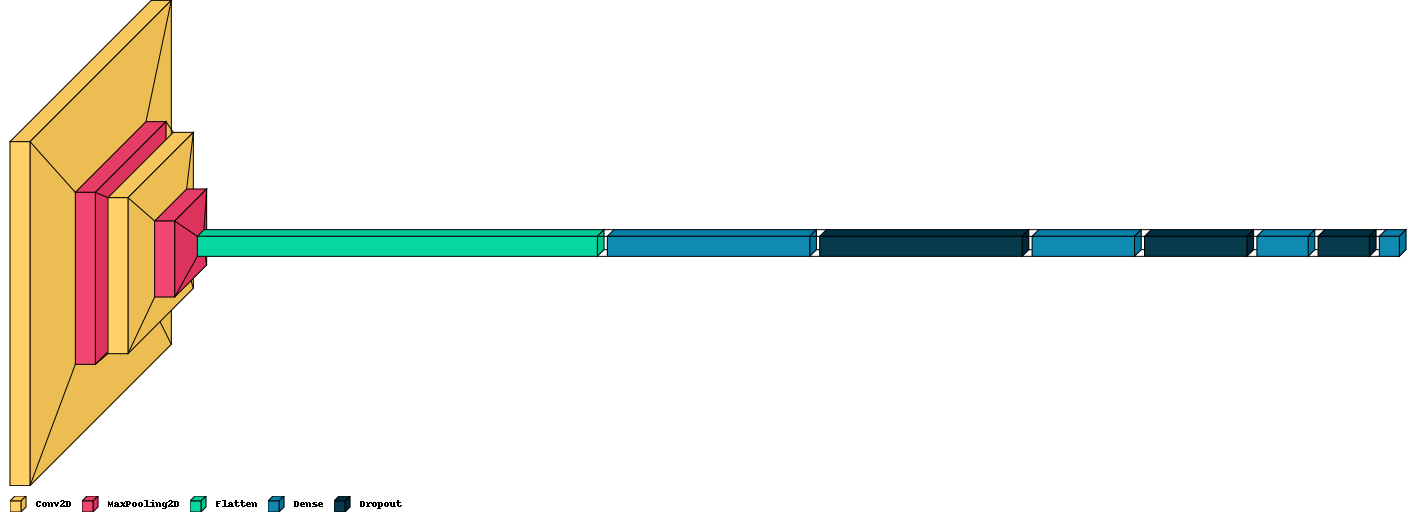

In [26]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(cnn_model, legend=True)

In [9]:
score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.2831
test acc 0.9563


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


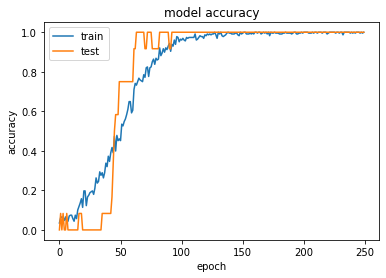

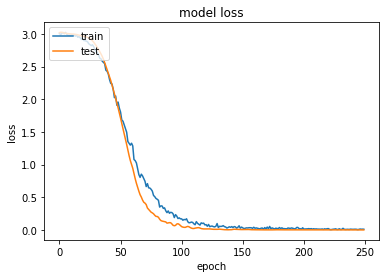

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 88ms/step
accuracy : 
0.95625
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without n

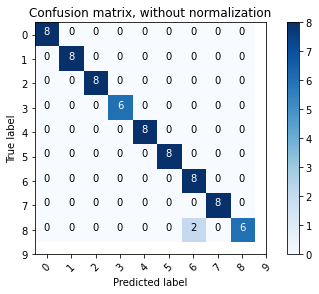

Confusion matrix, without normalization


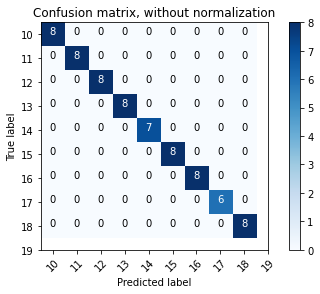

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1

In [25]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
# ynew = cnn_model.predict_classes(x_test)
predict_x=cnn_model.predict(x_test) 
ynew=np.argmax(predict_x,axis=1)

Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))